In [1]:
## Data Initializing

In [7]:
import pandas as pd
import numpy as np
import data_handler as dh
import transport_graph as tg
import model
import time
import matplotlib.pyplot as plt
from matplotlib import rc
import pickle

In [8]:
net_name = 'SiouxFalls_net.tntp'
trips_name = 'SiouxFalls_trips.tntp'

In [9]:
handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns_order = np.array([0, 1, 2, 4]))
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)
graph = tg.TransportGraph(graph_data)

In [10]:
gammas = np.logspace(1, -3, 5)
flows = []
times = []
iter_nums = []

for gamma in gammas:
    tic = time.time()
    print('gamma = ' + str(gamma))
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               gamma = gamma, mu = 0.25, rho = 0.15, epsilon = 1e-3, 
                               max_iter = 5000, verbose = True)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    flows.append(result['flows'])
    times.append(result['times'])
    iter_nums.append(result['iter_num'])

gamma = 10.0
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.296497368773
Success!  Iterations number: 10
Duality_gap / Duality_gap_init = 0.000940043976226
Phi big oracle elapsed time: 0 sec
Elapsed time: 1 sec
gamma = 1.0
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.462270677082
Iterations number: 10
Duality_gap / Duality_gap_init = 0.015894516001
Iterations number: 15
Duality_gap / Duality_gap_init = 0.00376214916884
Success!  Iterations number: 20
Duality_gap / Duality_gap_init = 0.00096181402589
Phi big oracle elapsed time: 1 sec
Elapsed time: 1 sec
gamma = 0.1
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.9

In [5]:
with open('flows.pickle', 'wb') as f:
    pickle.dump(flows, f)
with open('times.pickle', 'wb') as f:
    pickle.dump(times, f)
with open('iter_nums.pickle', 'wb') as f:
    pickle.dump(iter_nums, f)

In [6]:
def ReadAnswer(filename):
    with open(filename) as myfile:
        lines = myfile.readlines()
    lines = np.array(lines)[range(1, len(lines))]
    values_dict = {'flow': [], 'time': []}
    for line in lines:
        line = line.strip('[ \n]')
        nums = line.split(' \t')
        values_dict['flow'].append(float(nums[2]))
        values_dict['time'].append(float(nums[3]))
    return values_dict

In [7]:
values_dict = ReadAnswer('SiouxFalls_flow.tntp')
flow_star = values_dict['flow']
time_star = values_dict['time']
delta = []
for flow in flows:
    delta.append(np.linalg.norm(flow - flow_star, ord = 1) / np.linalg.norm(flow_star, ord = 1))

In [7]:
epsilons = 1.0 / np.linspace(1e1, 1e5, 5)
iter_nums_for_epsilons = []
for epsilon in epsilons:
    print('epsilon = ' + str(epsilon))
    tic = time.time()
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               gamma = 0.1, mu = 0.25, rho = 0.15, epsilon = epsilon, 
                               max_iter = 5000, verbose = True)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    iter_nums_for_epsilons.append(result['iter_num'])

epsilon = 0.1
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.974955380682
Iterations number: 10
Duality_gap / Duality_gap_init = 0.145558232471
Success!  Iterations number: 11
Duality_gap / Duality_gap_init = 0.0836471274656
Elapsed time: 15 sec
epsilon = 3.99880035989e-05
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.974955380682
Iterations number: 10
Duality_gap / Duality_gap_init = 0.145558232471
Iterations number: 15
Duality_gap / Duality_gap_init = 0.0155489586555
Iterations number: 20
Duality_gap / Duality_gap_init = 0.00774546171574
Iterations number: 25
Duality_gap / Duality_gap_init = 0.00465934764852
Iterations number: 30
Duality_gap / Duality_gap_init = 0.00249398014754
Iterations number: 35
Duality_gap / Duality_gap_init = 0.

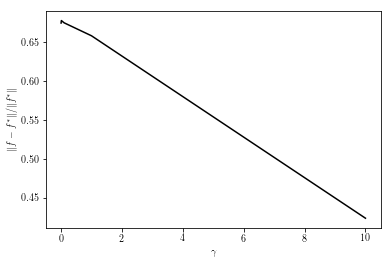

In [8]:
plt.rc('text', usetex = True)
plt.plot(gammas, delta, 'black')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\|f - f^*\| / \|f^*\|$')
#plt.axis([0, 6, 0, 20])
plt.savefig('first_picture_sioux.png', dpi = 1000)
plt.show()

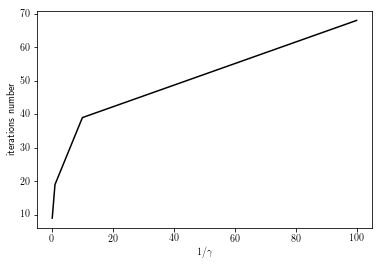

In [9]:
plt.plot(1.0 / gammas, iter_nums, 'black')
plt.xlabel(r'$1 / \gamma$')
plt.ylabel('iterations number')
plt.savefig('second_picture_sioux.png', dpi = 1000)
plt.show()

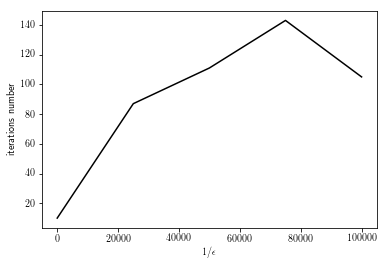

In [10]:
plt.plot(1.0 / epsilons, iter_nums_for_epsilons, 'black')
plt.xlabel(r'$1 / \epsilon$')
plt.ylabel('iterations number')
plt.savefig('third_picture_sioux.png', dpi = 1000)
plt.show()